In [1]:
import pandas as pd
import os
import numpy as np

In [23]:
#fname = 'Enoo'
#fname = 'Enos'
#fname = 'Nakao'
#fname = 'Nakas'
#fname = 'Ozeo2'
fname = 'Ozes'
#fname = 'sugio_ok'
#fname = 'sugis_ok'
#fname = 'tano_ok'
#fname = 'tans_ok'

data = pd.read_table(os.path.join('ivr',fname + '.tsv'))

In [24]:
Frame = data['Frame'].to_numpy()
X = np.vstack([data['face_Tx'].to_numpy(),data['face_Ty'].to_numpy(),data['face_Tz'].to_numpy()]).T
V = np.vstack([data['z_adj_x'].to_numpy(),data['z_adj_y'].to_numpy(),data['z_adj_z'].to_numpy()]).T
roll  = data['roll'].to_numpy()
pitch = data['pitch'].to_numpy()
yaw   = data['yaw'].to_numpy()
V = V / np.linalg.norm(V,axis=1)[:,None]

In [25]:
# duration = 1 min (30fps)
DURATION = 30*60

# draw graphs
R_list = []
P_list = []
Y_list = []
V_list = []
for i in range(0,Frame[-1],DURATION):
    R = np.mean(roll[np.where((Frame >= i) & (Frame < i + DURATION))])
    P = np.mean(pitch[np.where((Frame >= i) & (Frame < i + DURATION))])
    Y = np.mean(yaw[np.where((Frame >= i) & (Frame < i + DURATION))])
    R_list.append(R)
    P_list.append(P)
    Y_list.append(Y)
    
    VV = np.mean(V[np.where((Frame >= i) & (Frame < i + DURATION)),1])
    V_list.append(VV)

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

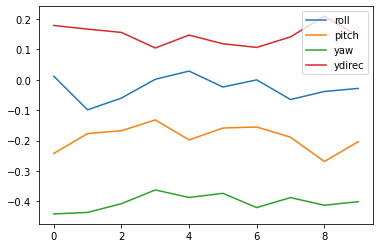

In [27]:
plt.plot(R_list,label="roll")
plt.plot(P_list,label='pitch')
plt.plot(Y_list,label='yaw')
plt.plot(V_list,label='ydirec')
plt.legend()

In [28]:
T = X[:,2] / V[:,2]
XX = X[:,0] + V[:,0]*T
YY = X[:,1] + V[:,1]*T

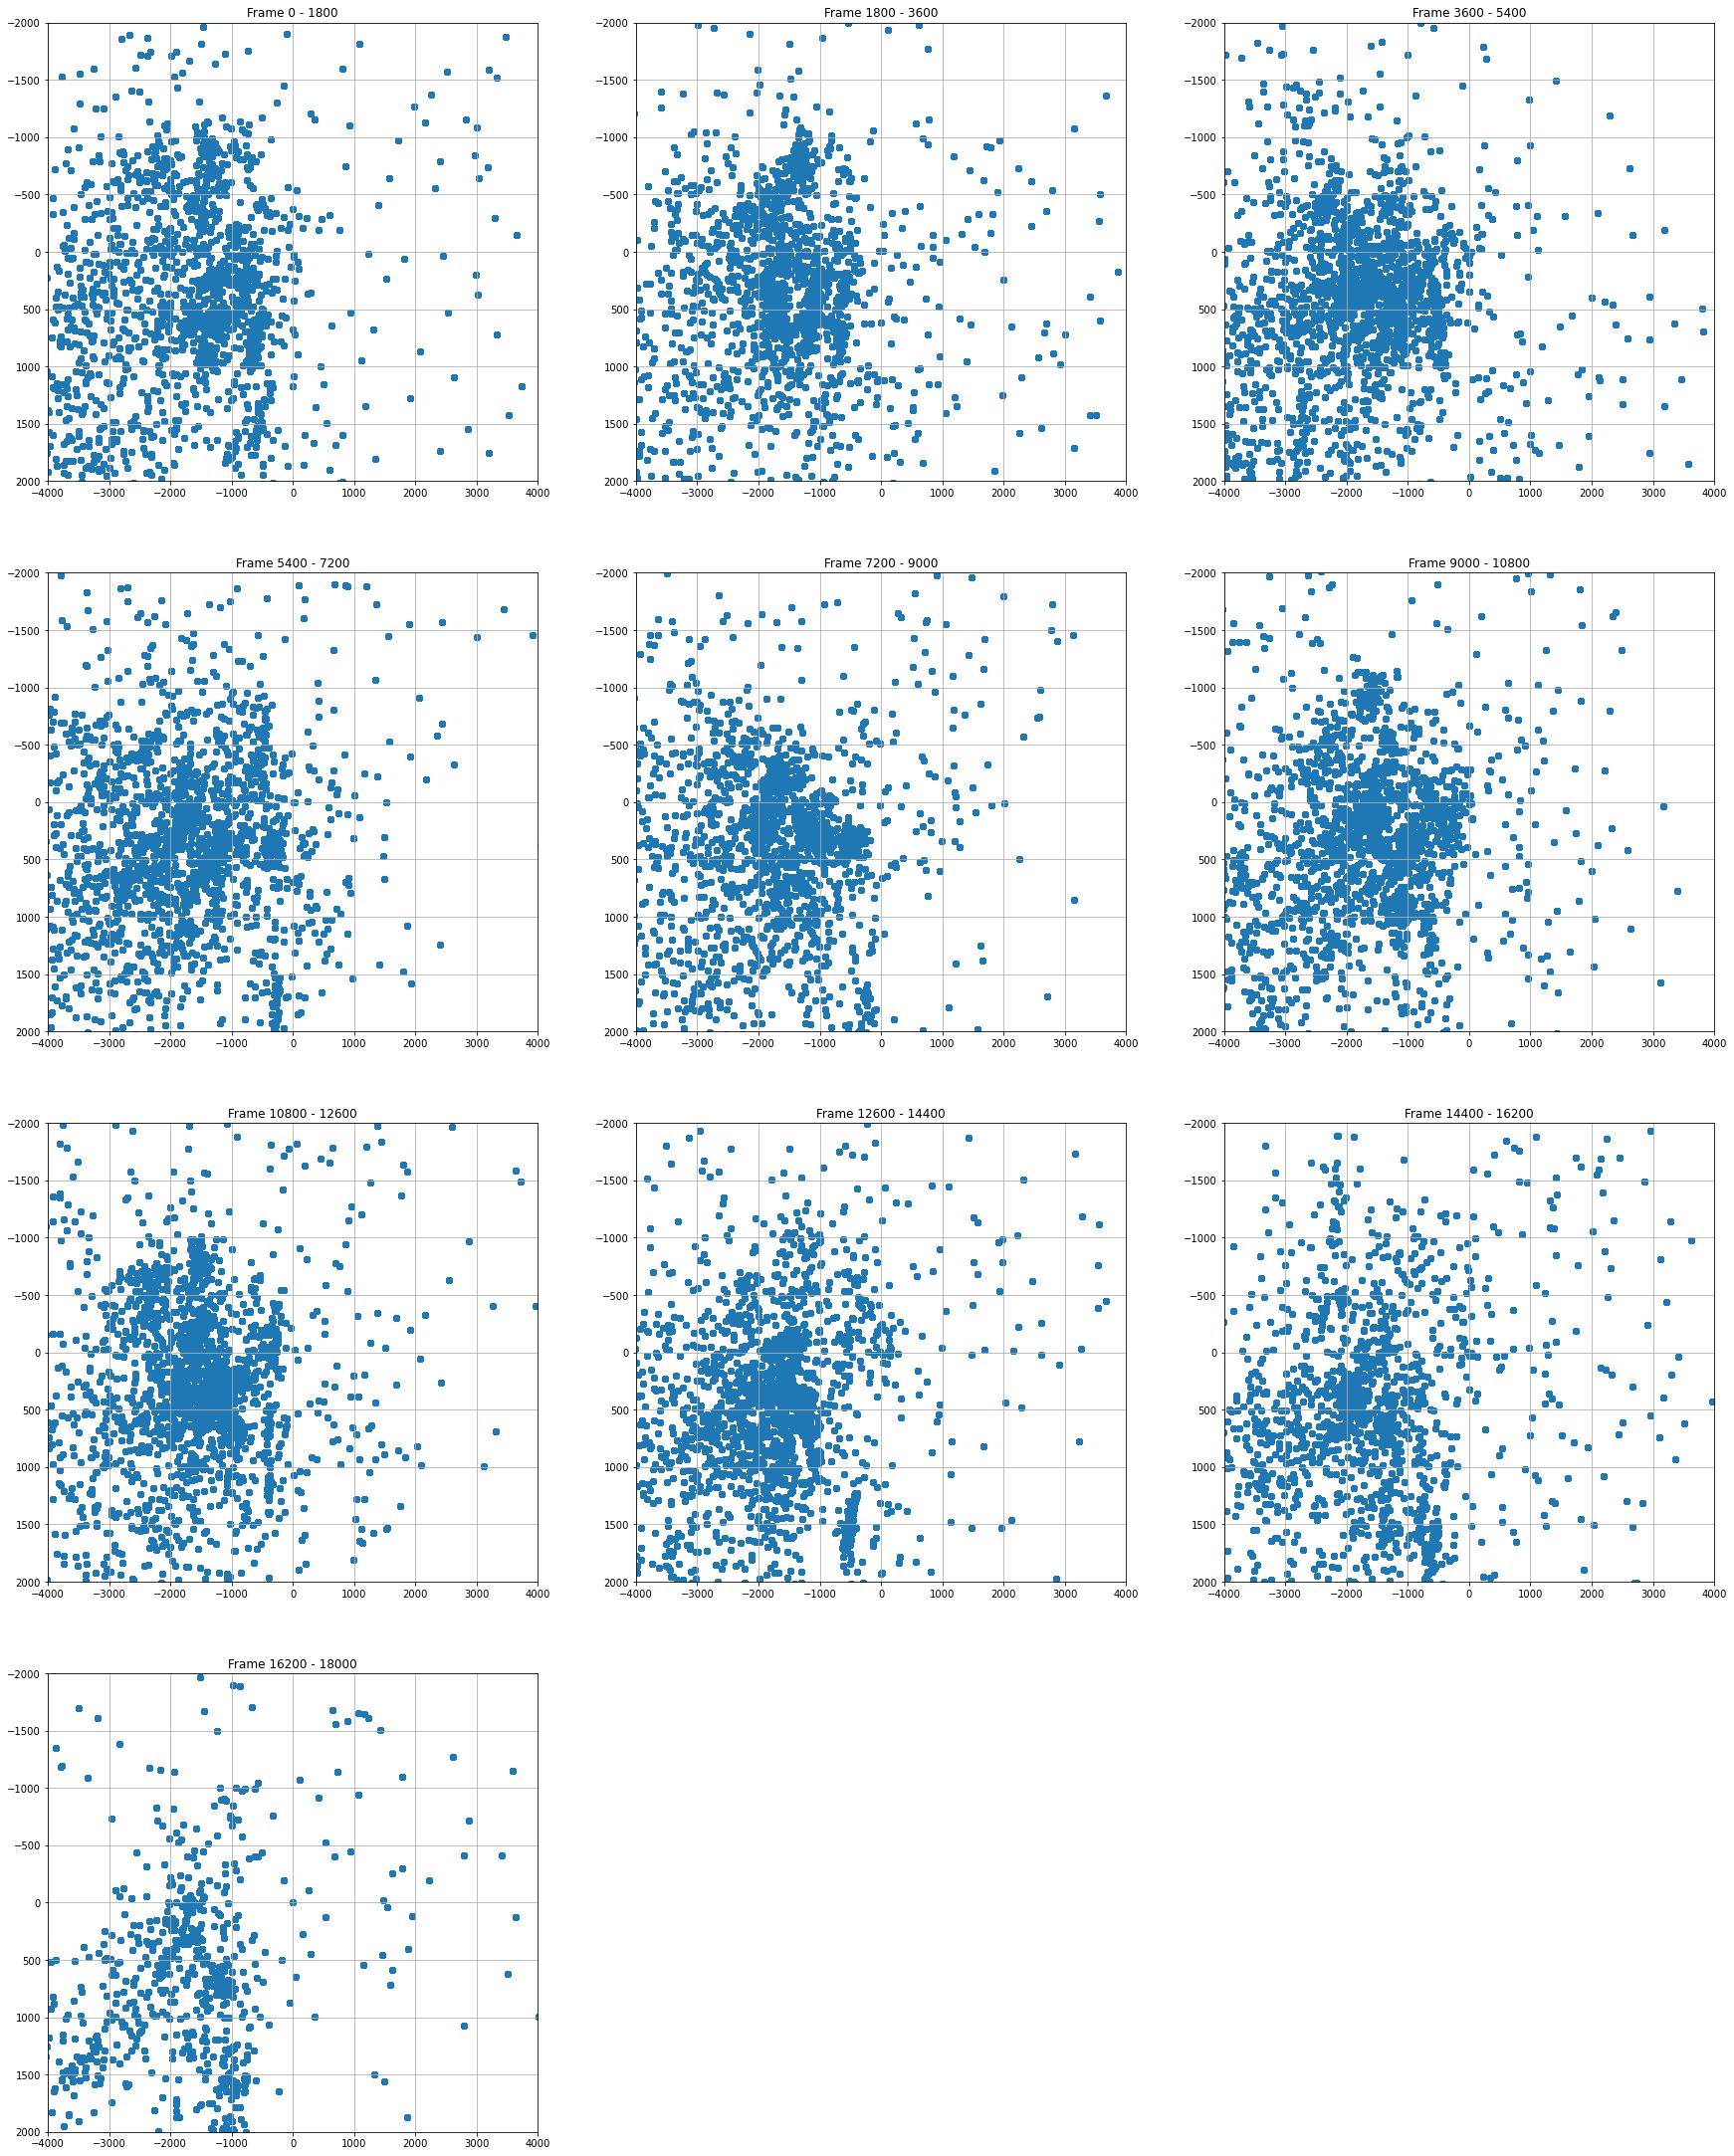

In [29]:
# simple scatter plot or heatmap plot (slow)
PLOT = 'SIMPLE'
#PLOT = 'HEATMAP'

# save figure option
SAVEFIG = False

plt.figure(figsize=(30,100))

for n,i in enumerate(range(0,Frame[-1],DURATION)):
    plt.subplot(10,3,n+1)
    plt.title(f'Frame {i} - {i+DURATION}')
    XXX = XX[np.where((Frame >= i) & (Frame < i + DURATION))]
    YYY = YY[np.where((Frame >= i) & (Frame < i + DURATION))]
    
    xy = np.vstack([XXX,YYY])
    
    if PLOT == 'HEATMAP':
        z = gaussian_kde(xy)(xy)
        plt.scatter(XXX, YYY, c=z, s=5, cmap="jet")
    else:    
        plt.scatter(XXX,YYY)
    
    #plt.invert_yaxis()
    # fig.colorbar(im)
    plt.xlim(-4000,4000)
    plt.ylim(2000,-2000)    
    plt.grid()

if SAVEFIG:
    plt.savefig(fname + '.pdf')

plt.show()

In [30]:
# 発表者カメラ
# 発表者
# X=500-2000
# Y=-1000-500
#スライド
# X=1800-3200
# Y=-300-1000

#スライドカメラ
#発表者
#X=-3500 - -1500
#Y=-500 - 800
#スライド
#X=-1500 - 0
#Y=-400 - 1200

total = []
gaze_slide = []
gaze_presenter = []

#CAMERA = "PRESENTER"
CAMERA = "SLIDE"

for n,i in enumerate(range(0,Frame[-1],DURATION)):
    XXX = XX[np.where((Frame >= i) & (Frame < i + DURATION))]
    YYY = YY[np.where((Frame >= i) & (Frame < i + DURATION))]
    xy = np.vstack([XXX,YYY])
    
    total.append(xy.shape[1])

    if CAMERA == 'PRESENTER':
        # gaze for presenter
        idx = np.where((xy[0,:] > 500) & (xy[0,:] < 2000) & (xy[1,:] > -1000) & (xy[1,:] < 500))
        gaze_presenter.append(len(idx[0])) 
        # gaze for slide
        idx = np.where((xy[0,:] > 1800) & (xy[0,:] < 3200) & (xy[1,:] > -300) & (xy[1,:] < 1000))
        gaze_slide.append(len(idx[0]))
    else:
        # in case 'SLIDE' camera
        # gaze for presenter
        idx = np.where((xy[0,:] > -3500) & (xy[0,:] < -1500) & (xy[1,:] > -500) & (xy[1,:] < 800))
        gaze_presenter.append(len(idx[0])) 
        # gaze for slide
        idx = np.where((xy[0,:] > -1500) & (xy[0,:] < 0) & (xy[1,:] > -400) & (xy[1,:] < 1200))
        gaze_slide.append(len(idx[0]))    

Ozes slide [0.19416203 0.17351524 0.19148983 0.18985103 0.1843337  0.24864347
 0.24716122 0.14487144 0.10946534 0.12800835]
Ozes presenter [0.11779454 0.19681978 0.20801677 0.20681571 0.19116975 0.16635812
 0.19633043 0.19334624 0.14680587 0.16723969]


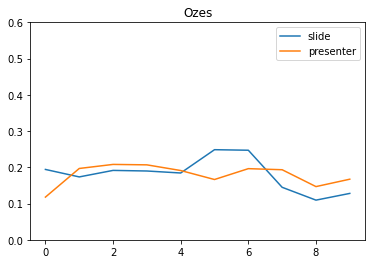

In [31]:
plt.plot(np.array(gaze_slide) / np.array(total), label='slide')
plt.plot(np.array(gaze_presenter) / np.array(total), label='presenter')
plt.title(fname)
plt.legend()
plt.ylim([0,0.6])

print(fname,'slide',np.array(gaze_slide) / np.array(total))
print(fname,'presenter',np.array(gaze_presenter) / np.array(total))

plt.savefig(fname + '-gazeplot.pdf')